In [16]:
import experts

from experts import problems
from experts.problems import ScalarExpertsProblem

import numpy as np
import pandas as pd
import seaborn as sns

import random


In [17]:
n_experts = 10
t_time = 100
beta = 0.01

# create a matrix of experts,
# each is just a random sequence
# of length t_time
# so we don't need to also pass t_time,
# or n_expers
# both are given by the dimension of this matrix
experts_ = np.random.rand(t_time, n_experts)

outcomes = np.floor(2*np.random.rand(t_time))

# This is probably what you would expect
# when the experts and the outcome
# are all random sequences

In [18]:
A = ScalarExpertsProblem(n_experts, t_time, experts_, outcomes)
result = A.mixture(beta)


In [19]:
expert_losses = np.sum(result["expert-loss"], axis = 0)
best_expert_total_loss = np.min(expert_losses)
best_expert_index = np.argmin(expert_losses)


In [20]:
df = pd.DataFrame(
    dict(
        time = np.arange(100),
        total_loss = result["learner-loss"],
        best_expert_loss = result["expert-loss"][:, best_expert_index]
        )
    )

df_long = pd.melt(df, ['time'])


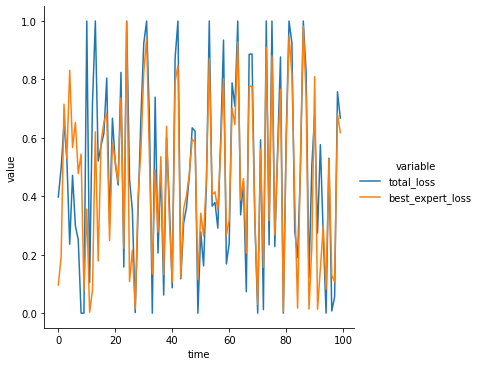

In [21]:
sns.relplot(x = "time", y = "value", hue = "variable", kind = "line", data = df_long)


In [22]:
df_cum = pd.DataFrame(
    dict(
        time = np.arange(100),
        total_loss = result["learner-loss"].cumsum(),
        best_expert_loss = result["expert-loss"][:, best_expert_index].cumsum()
        )
    )

df_cum_long = pd.melt(df, ['time'])


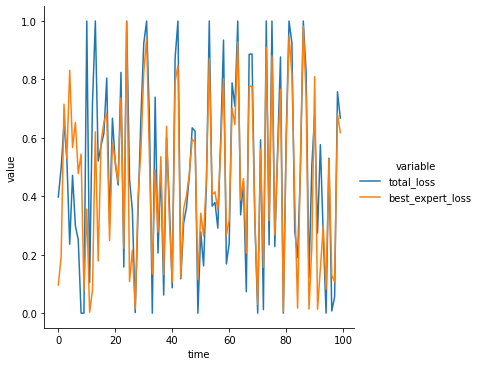

In [23]:
sns.relplot(x = "time", y = "value", hue = "variable", kind = "line", data = df_cum_long)

# On the other hand,
# when the outcome sequence
# is one of the experts,
# the learning algorithm
# quickly follows the predictions
# of that leading expert


In [24]:
# add outcomes as one of the experts
experts_[:, n_experts - 1] = outcomes

# with some gaussian noise (should do this first?)
for t in range(t_time):
  a = random.gauss(0, 0.01)
  if 0 <= a + experts_[t, n_experts - 1] <= 1:
    experts_[t, n_experts - 1] = a + experts_[t, n_experts - 1]


In [25]:
A = ScalarExpertsProblem(n_experts, t_time,  experts_, outcomes)
result = A.mixture(beta)

# recalculate best expert

In [26]:
expert_losses = np.sum(result["expert-loss"], axis = 0)
best_expert_total_loss = np.min(expert_losses)
best_expert_index = np.argmin(expert_losses)


In [27]:
df = pd.DataFrame(
    dict(
        time = np.arange(100),
        loss = result["learner-loss"],
        best_expert_loss = result["expert-loss"][:, best_expert_index]
    )
)

df_long = pd.melt(df, ['time'])


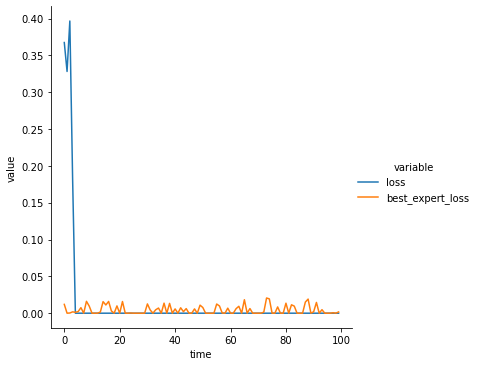

In [28]:
sns.relplot(x = "time", y = "value", hue = "variable", kind = "line", data = df_long)


In [29]:
df_cum = pd.DataFrame(
    dict(
        time = np.arange(100),
        total_loss = result["learner-loss"].cumsum(),
        best_expert_loss = result["expert-loss"][:, best_expert_index].cumsum()
        )
    )

df_cum_long = pd.melt(df_cum, ['time'])


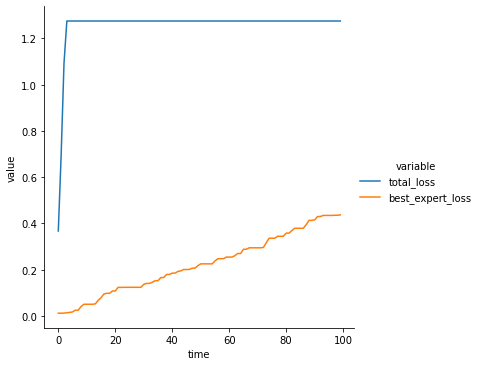

In [30]:
sns.relplot(x = "time", y = "value", hue = "variable", kind = "line", data = df_cum_long)
